# SQL 2 Exercises 

## Important Instructions Before Starting Exercises
The exercises uses the data from the **University Schema** (same one in the lecture). Before you start the exercises, download from moodle the `.sql` files and import the database using the instructions from [this website](https://www.digitalocean.com/community/tutorials/how-to-import-and-export-databases-in-mysql-or-mariadb).

Further Instructions:
1. Pick a name and create your database.
2. Follow the instruction on the website and import the `DDL.sql` file to your database. This file **only creates the tables and its relationships with other tables**.
3. Follow the instruction on the website and import the `smallRelationsInsertFile.sql` file to the same database. This file **fills in the data into the tables**.
---

## Recap Exercises (Relational Algebra)

Consider the following tables.<br>
**Table:** student

| id | name |
|:---|:---|
| 1234 | joe |
| 4000 | hector |
| 2000 | ling |

**Table:** enrolledIn

| id | code |
|:---|:---|
| 1234 | cs1500 |
| 1234 | cs1200 |
| 1234 | cs2001 |
| 4000 | cs3010 |
| 4000 | ma3000 |

**Table:** subject

| code | lecturer |
|:---|:---|
| cs1500 | curtis |
| cs1200 | dave |
| cs2001 | olivier |
| cs3010 | curtis |
| ma3000 | roger |

Figure out which relational algebra operations were used to obtain each of the following tables.

**Qn 1)**

| name |
|:---|
| joe |
| hector |
| ling |

**Qn 2)**

| name |
|:---|
| curtis |
| dave |
| olivier |
| roger |

**Qn 3)** There are 2 ways to get this table, write both ways down.

| code | lecturer |
|:---|:---|
| cs1500 | curtis |
| cs3010 | curtis |

**Qn 4)** There are many ways to get this table, write down at least different 3 ways.
 
| id | name |
|:---|:---|
| 1234 | joe |
| 4000 | hector |

**Qn 5)** There are many ways to get this table, write down 1 way.

| id | name | code |
|:---|:---|:---|
| 1234 | joe | cs1500 |
| 1234 | joe | cs1200 |
| 1234 | joe | cs2001 |

**Qn 6)**

| id | name | code | lecturer |
|:---|:---|:---|:---|
| 4000 | hector | cs3010 | curtis |
| 4000 | hector | ma3000 | roger |

### Answers for Recap section

**Qn 1)** $\pi_{name} (student)$

**Qn 2)** $\pi_{lecturer} (subject)$

**Qn 3)** $\sigma_{lecturer="curtis"} (subject)$ <br> $\sigma_{code="cs1500" \vee code="cs3010"} (subject)$

**Qn 4)** $\sigma_{name="joe" \vee name="hector"} (student)$ <br> $\pi_{id, name} (student \Join enrolledIn)$ <br>
$student - \sigma_{name="ling"} (student)$

**Qn 5)** $\sigma_{name="joe"} (student \Join enrolledIn)$ 

**Qn 6)** $(\sigma_{name="hector"} (student)) \Join (enrolledIn) \Join (subject)$ 

---
## SQL 2

### Question 1
Given the database schema of a bank below (primary keys are denoted by `PK` after their field), answer the following questions

```
branch(branch_name PK, branch_city, assets)
customer (ID PK, customer_name, customer_street, customer_city)
loan (loan_number PK, branch_name, amount)
borrower (ID PK, loan_number PK)
account (account_number PK, branch_name, balance )
depositor (ID PK, account_number PK)
```

**a)** Find the ID of each customer of the bank who has an account but not a loan. <br>
**b)** Find the ID of each customer who lives on the same street and in the same city as customer '12345'. <br>
**c)** Find the name of each branch that has at least one customer who has an account in the bank and who lives in "Harrison".

### Answers for Qn 1

**a)**
```sql
(SELECT ID FROM depositor)
EXCEPT
(SELECT ID FROM borrower);
```
**b)**
```sql
SELECT cust1.ID FROM customer AS cust1, customer AS cust2 
    WHERE cust1.customer_city = cust2.customer_city
    AND cust1.customer_street = cust2.customer_street
    AND cust2.ID="12345";
```
**c)**
```sql
SELECT DISTINCT branch_name FROM account, customer, depositor
    WHERE account.acount_number = depositor.acount_number
    AND depositor.ID = customer.ID
    AND customer.customer_city="Harrison";
```

### Question 2
Investigate the following operators using the **University schema** (your loaded database) and find out which operator is equivalent to which operator:

**a)** is the `IN` operator equivalent to the `= SOME` operators? (use Scenario 1)<br>
**b)** is the `NOT IN` operator equivalent to the `<> SOME` operators? (use Scenario 2)<br>
**c)** is the `NOT IN` operator equivalent to the `<> ALL` operators? (use Scenario 2)<br>

Use the follow scenarios:
1. Find all student names and IDs that are taking the course `CS-190` and `CS-347`.
2. Find all student names and IDs that are not taking the course `CS-190` and `CS-347`.

### Answers for Qn 2

**a)** is the `IN` operator equivalent to the `= SOME` operators?  <- **yes**
```sql
SELECT s.ID, s.name AS re_in FROM student AS s WHERE s.ID IN 
(SELECT ID FROM takes WHERE course_id="CS-190" OR course_id="CS-347" AND ID=s.ID);

SELECT s.ID,s.name AS re_some FROM student AS s WHERE s.ID = SOME  
(SELECT ID FROM takes WHERE course_id="CS-190" OR course_id="CS-347" AND s.ID=ID);
```

**b)** is the `NOT IN` operator equivalent to the `<> SOME` operators?  <- **no**
```sql
SELECT s.ID, s.name AS re_in FROM student AS s WHERE s.ID NOT IN 
(SELECT ID FROM takes WHERE course_id="CS-190" OR course_id="CS-347" AND ID=s.ID);

SELECT s.ID,s.name AS re_some FROM student AS s WHERE s.ID <> SOME  
(SELECT ID FROM takes WHERE course_id="CS-190" OR course_id="CS-347" AND s.ID=ID);
```

**c)** is the `NOT IN` operator equivalent to the `<> ALL` operators?  <- **yes**
```sql
SELECT s.ID, s.name AS re_in FROM student AS s WHERE s.ID NOT IN 
(SELECT ID FROM takes WHERE course_id="CS-190" OR course_id="CS-347" AND ID=s.ID);

SELECT s.ID,s.name AS re_some FROM student AS s WHERE s.ID <> ALL  
(SELECT ID FROM takes WHERE course_id="CS-190" OR course_id="CS-347" AND s.ID=ID);
```

### Question 3
Write the following queries in SQL, using the **University schema**. Answer the following questions:

**a)** Find the titles and course ids of courses in the Comp. Sci. department that have 3 credits. <br>
**b)** Find the IDs of all students who were taught by an instructor named Einstein; make sure there are no duplicates in the result. <br>
**c)** Find the highest salary of any instructor. <br>
**d)** Find all instructors earning the highest salary (there may be more than one with the same salary). <br>
**e)** Find the enrollment of each section that was offered in Fall 2017. <br>

## Answers for Qn 3

**a)** 
```sql
SELECT course_id, title FROM course WHERE dept_name="Comp. Sci." AND credits=3;
```
**b)**
```sql
SELECT DISTINCT takes.ID FROM takes, instructor, teaches 
WHERE takes.course_id = teaches.course_id 
AND takes.sec_id = teaches.sec_id
AND takes.semester = teaches.semester
AND takes.year = teaches.year
AND teaches.ID = instructor.ID
AND instructor.name = "Einstein";

/* out of scope but good to know*/
SELECT ID FROM (
    SELECT course_id FROM teaches NATURAL JOIN instructor 
    WHERE instructor.name = "Einstein") o 
LEFT JOIN takes ON takes.course_id = o.course_id;
```
**c)** 
```sql 
SELECT MAX(salary) FROM instructor;
```
**d)**
```sql
SELECT ID, name FROM instructor WHERE salary = (SELECT MAX(salary) FROM instructor);
```
**e)**
```sql
SELECT course_id, sec_id, 
    (SELECT COUNT(ID) FROM takes
     WHERE takes.year = section.year 
     AND takes.semester = section.semester 
     AND takes.course_id = section.course_id 
     AND takes.sec_id = section.sec_id )
     AS enrollment
FROM section WHERE semester="Fall" AND year=2017;
```

### Question 4
Continuation of Qn 3. Suppose you are given a new table (called `grade_points`) of values to convert letter grades to points. <br>
Add this table to your loaded database.

**Table Schema:** `grade_points(grade PK, points DECIMAL(4,2))` <br>
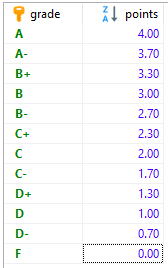

The grade points earned by a student for a course offering (section) is defined as the number of credits for the course multiplied by the numeric points for the grade that the student received. For simplicity sake assume that the no `takes` tuple has the `NULL` value for `grade`.

**a)** Find the total grade points earned by the student with ID `12345`, across all courses taken by the student. <br>
**b)** Find the grade point average (GPA) for the above student, that is, the total grade points divided by the total credits for the associated courses. <br>
**c)** Find the ID and the grade-point average of each student. <br>
**d)** Going back to parts **a**, **b** and **c**, consider what will happen if there are `NULL` values in the grades. Update the SQL statements to account for the `NULL` value grades. You can use either use student ID `98988` or add some new records with `NULL` grades to student ID `12345`.

### Answers for Qn 4

**a)**
```sql
SELECT SUM(credits * points) FROM takes, course, grade_points
    WHERE takes.grade = grade_points.grade 
    AND takes.course_id = course.course_id
    AND takes.ID="12345";
```
**b)**
```sql
SELECT SUM(credits * points)/SUM(credits) AS GPA
 FROM takes, course, grade_points
 WHERE takes.grade = grade_points.grade 
    AND takes.course_id = course.course_id
    AND takes.ID="12345";
```
**c)**
```sql
SELECT ID, SUM(credits * points)/SUM(credits) AS GPA
 FROM takes, course, grade_points
 WHERE takes.grade = grade_points.grade 
    AND takes.course_id = course.course_id
    GROUP BY ID;
```
**d)**
```sql
/*a*/
(SELECT SUM(credits * points) FROM takes, course, grade_points
    WHERE takes.grade = grade_points.grade 
    AND takes.course_id = course.course_id
    AND takes.ID="12345")
UNION 
(SELECT 0 FROM student
 WHERE ID = "12345" AND NOT EXISTS
    (SELECT * FROM takes WHERE ID="12345"));

/*b*/
(SELECT SUM(credits * points)/SUM(credits) AS GPA
 FROM takes, course, grade_points
 WHERE takes.grade = grade_points.grade 
     AND takes.course_id = course.course_id
     AND takes.ID="12345")
UNION 
(SELECT NULL as GPA FROM student
 WHERE ID = "12345" AND NOT EXISTS
    (SELECT * FROM takes WHERE ID="12345"));

/*c*/
(SELECT ID, SUM(credits * points)/SUM(credits) AS GPA
 FROM takes, course, grade_points
 WHERE takes.grade = grade_points.grade 
     AND takes.course_id = course.course_id
     GROUP BY ID)
UNION 
(SELECT ID, NULL as GPA FROM student
 WHERE NOT EXISTS
    (SELECT * FROM takes WHERE takes.ID=student.ID));
```

### Question 5
Write the following queries in SQL (use the **University database** to check your SQL statements):<br>
**a)** Display a list of all instructors, showing each instructor’s ID and the number of sections taught. Make sure to show the number of sections as 0 for instructors who have not taught any section. Your query should use an outer join, and should not use subqueries

**b)** Write the same query as in part a, but using a scalar subquery (aka a subquery returning only a single number) and not using outer join.

**c)** Display the list of all departments, with the total number of instructors in each department, without using subqueries. Make sure to show departments that have no instructors, and list those departments with an instructor count of zero.

### Answers for Question 5
**a)**
```sql
SELECT ID, COUNT(sec_id) AS number_of_sections
FROM instructor NATURAL LEFT OUTER JOIN teaches
GROUP BY ID;
```

**b)**
```sql
SELECT ID, 
    (SELECT COUNT(*) FROM teaches 
     WHERE teaches.ID=instructor.ID) AS number_of_sections
FROM instructor;
```

**c)**
```sql
SELECT dept_name, COUNT(ID) AS number_of_instructors
FROM department NATURAL LEFT OUTER JOIN instructor
GROUP BY dept_name;
```